<div style="border:solid green 2px; padding: 20px">

<b>Привет, Максим! Поздравляю с выполнением очередного проекта!!</b>

Меня зовут Петр Раздобреев и я буду проверять твою работу. Попробую помочь сделать тебе её еще лучше! В Практикуме принято общени на ты, но если это дискомфортно, то сообщи об этом)

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ Так выделены небольшие замечания.Такие замечания в проекте допустимы, это пространство для улучшений в будущем.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Так я выделяю успешные идеи.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
    

<div class="alert alert-info"> <b>Комментарий студента:</b> Привет👋, договорились) 

я заметил список глав,  когда открыл проверенную работу, и у меня он мягко говоря непонятный) на странице курсов в тренажере 
есть кнопка юпитера table of contents у меня в юпитере её нет) как её добавить?))</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Здравствуй, Максим. Да, есть модуль `toc`, его можно установить дополнительно себе, нашёл такой материал - https://pcmac.download/app/1080500034/toc. Может быть используешь другую инструкцию

</div>

# Проект: Статистический анализ данных

## Введение

Популярный сервис аренды самокатов GoFast, его специалисты,  передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти, такие как:

- 1 Тратят ли пользователи с подпиской больше времени на поездки?
- 2 Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
- 3 Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Предварительно Изучить, Предобработать, Визуализировать, Объединить данные и Подсчитать выручку.

## Описание данных

В основных данных есть информация о пользователях, их поездках и подписках.

Пользователи — `users_go.csv`
| | |
|--|--|
|user_id |	уникальный идентификатор пользователя |
|name |	имя пользователя |
|age |	возраст|
|city |	город|
|subscription_type |	тип подписки (free, ultra)|

Поездки — `rides_go.csv`

| | |
|--|--|
|user_id|	уникальный идентификатор пользователя|
|distance|	расстояние, которое пользователь проехал в текущей сессии (в метрах)|
|duration|	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»|
|date|	дата совершения поездки|

Подписки — `subscriptions_go.csv`

| | |
|--|--|
|subscription_type|	тип подписки|
|minute_price|	стоимость одной минуты поездки по данной подписке|
|start_ride_price|	стоимость начала поездки|
|subscription_fee|	стоимость ежемесячного платежа|


# 1. Шаг 1. Загрузка данных

In [1]:
import pandas as pd
try:
    #локальный доступ из той же папки где тетрадь
    users = pd.read_csv('users_go.csv')
    rides = pd.read_csv('rides_go.csv')
    subscriptions = pd.read_csv('subscriptions_go.csv')
except:
     #общедоступный доступ к файлу
    users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
    rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
    subscriptions = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')
    

In [2]:
def i(df):
    df.info()
    display(df)

i(users)
print('*'*50)
i(rides)
print('*'*50)
i(subscriptions)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04
18064,1534,2840.423057,21.409799,2021-11-16
18065,1534,3826.185507,18.435051,2021-11-18
18066,1534,2902.308661,16.674362,2021-11-27


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<div class="alert alert-info"> <b>Комментарий студента:</b> Отличный совет  </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Пожалуйста, ещё можно добавить разделитель между методами анализа вот так `print('*'*50)`. Ну и в функцию хорошо бы добавить вывод числа дубликатов  
</div>

users.info()
users

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
* Неважно в какой строке вызывать `info`, в любом случае результат будет выведен на экран и без `display`, а вот вывод датафрейма без дополнительного `display` произойдёт только в послежней строке, в связи с этим рекомендую поменять порядок 
    
* Кажется забавным писать несколько десятков слов, чтобы помочь сэкономить написания 9 символов)    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Хорошее замечание))  </div>

rides.info()
rides

subscriptions.info()
subscriptions

 данные из `subscriptions_go.csv` содержат описание:
 
 Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 
 
 
 Сервисом можно пользоваться:

"без подписки" - `free`

- Абонентская плата отсутствует - 0 рублей
- Стоимость старта (начала поездки) — 50 рублей
- Cтоимость одной минуты поездки — 8 рублей

C подпиской `Ultra`
- Абонентская плата — 199 рублей в месяц
- Стоимость старта — 0 рублей
- Стоимость одной минуты поездки — 6 рублей


### Хорошие новости:

Замечательные данные. 
- Описание совпадает
- Наименование столбцов не требует изменения
- Пропусков в данных не обнаружено
- Тип данных приемлемый, кроме столбца `date` переведу в `datetime`


# 2. Шаг 2. Предобработка данных

- [x] Поменять тип данных
- [x] Новый столбец с номером месяца
- [x] Наличие пропущенных значений и дубликатов, их обработка
- [x] Округление продолжительности поездки

## 2.1 Поменять тип данных столбца `date`в `datetime`

In [3]:
#переведу формат в datetime
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d') 

#выведу 1 строку и информацию для проверки применения типа данных.
display(rides.head(1))
rides.info()

,user_id,distance,duration,date
0,1,4409.91914,25.599769,2021-01-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


## 2.2 Новый столбец с номером месяца

In [4]:
#месяц совершения поездки
rides['month'] = rides['date'].dt.month 
display(rides.head(1))

,user_id,distance,duration,date,month
0,1,4409.91914,25.599769,2021-01-01,1


## 2.3 Наличие пропущенных значений и дубликатов, их обработка

Пропусков в данных не обнаружено, дубликаты требуют выявления.

In [5]:
#проверю явные дубликаты
print(users.duplicated().sum()) 
rides.duplicated().sum()

31


0

In [6]:
# выведу 1 дубликат
users[users.duplicated()].head(1)

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra


In [7]:
#одинаковые параметры могут быть но совпадение так же по `user_id` не применимо, удаляю
users = users.drop_duplicates().reset_index(drop=True)
users.duplicated().sum()

0

In [8]:
# проверю наличие дубликатов по 'user_id'
display(users['user_id'].value_counts().head(1))


user_id
1    1
Name: count, dtype: int64

In [9]:
display(users['city'].unique())

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
И про дубликаты не забываешь, замечательно. Но действия по первичному анализу датафреймов схожи, можно было бы функцию написать 

<div class="alert alert-info"> <b>Комментарий студента:</b> тут уже без display() не обойтись? как то так или ещё можно упростить?   </div>


def i(df):

    df.info()
    
    display(df)

i(users)

i(rides)

i(subscriptions)



<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Да, в таком случае не обойтись
</div>

Не явных дубликатов не обнаружено

## 2.4 Округление продолжительности поездки

In [10]:
# Продолжительность каждой поездки округлена для последующего расчета стоимости
import numpy as np

# каждое значение из столбца duration округляется с помощью «потолка»: 
rides['duration'] = np.ceil(rides['duration'])

# 3. Шаг 3. Исследовательский анализ данных

Описание и визуализация общей информации о пользователях и поездках


- [x] частота встречаемости городов
- [x] соотношение пользователей с подпиской и без подписки
- [x] возраст пользователей
- [x] расстояние, которое пользователь преодолел за одну поездку
- [x] продолжительность поездок

In [11]:
import matplotlib.pyplot as plt #для работы с графиками (в том числе гистограммами) импортирую библиотеку matplotlib

## 3.1 Частота встречаемости городов

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64


<Axes: title={'center': 'Количество пользователей в разных городах'}, xlabel='Города присутствия', ylabel='Количество пользователей'>

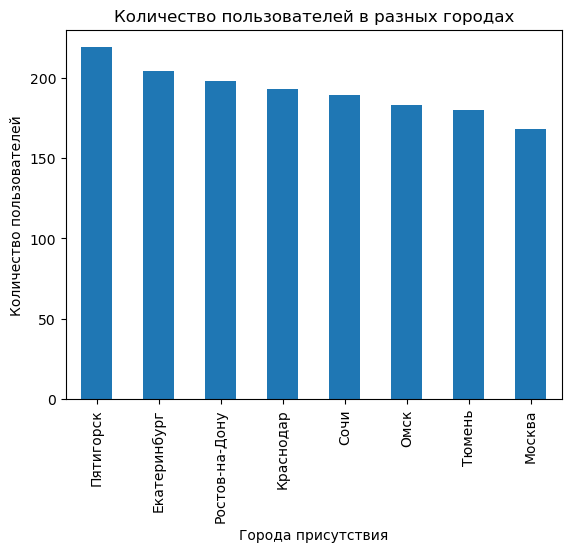

In [12]:
#количество пользователей в разных городах
print(users['city'].value_counts())
(
    users['city']
    .value_counts()
    .plot(kind='bar',
          title = 'Количество пользователей в разных городах',
         xlabel = 'Города присутствия',
         ylabel = 'Количество пользователей')
)


Присутствие в у казанных 8 городах, есть куда расти по географии, по количеству пользователей так же относительно не много около 1500 при населении этих городов около 20 млн. Так  максимальное 219 в Пятигорске и наименьшее 168 в Москве

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Прошу нанести на графики подписи осей, добавить заголовок. Чтобы разобраться с подписями рекомендую вот [эту статью](https://devpractice.ru/matplotlib-lesson-3-3-text-elements/)

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> сделано 👌   </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Спасибо и сортировка отличная!)

</div>

## 3.2 Соотношение пользователей с подпиской и без подписки

array([<AxesSubplot:ylabel='subscription_type'>], dtype=object)

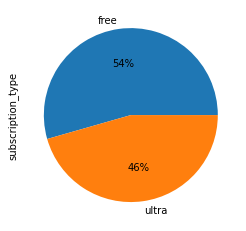

In [17]:
#соотношение пользователей с подпиской и без подписки

users['subscription_type'].value_counts().plot(kind='pie', subplots=True, autopct='%1.0f%%')

Соотношение стремится к равнозначному, при этом пользователей без подписки на 4 % больше(54%)

## 3.3 Возраст пользователей

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Text(0, 0.5, 'Количество пользователей')

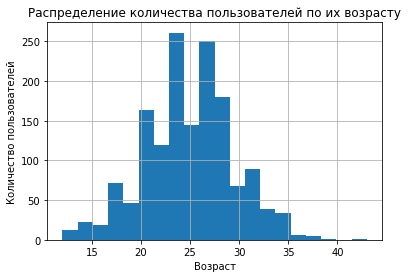

In [18]:
#распределение количества пользователей по их возрасту
display(users['age'].describe()) 
users['age'].hist(bins = 20)
plt.title('Распределение количества пользователей по их возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')

Сервис популярен среди пользователей от 20 до 30 лет. самый молодой пользователь 12 лет и пока зарегистрирован возраст в 43 года является максимальным.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Здесь вопрос, а законадательно возможна ли аренда столь юными пользователями. Такие факты хорошо бы проверять, выходя чуть за рамки непосредственно задания

<div class="alert alert-info"> <b>Комментарий студента:</b> Да стало интересно погрузится в эту тему, оказалось:

 - Прямого законодательного запрета на аренду самокатов закон не содержит: ст. 26 и ст. 28 ГК РФ вполне позволяют такие договоры считать мелкими бытовыми сделками, а их разрешено совершать с 6 лет без одобрения родителей – если деньги переданы были ребенку для свободного распоряжения.
 - Большинство фирм, сдающих самокаты в аренду, разрешают заключать договор только гражданам, достигшим 18 лет.
 - По закону сервисами кикшеринга могут пользоваться только те, кто достиг 18 лет.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Спасибо, можно было бы да сделать акцент на этой странности и поговорить предметнее с юридическим специалистом 
</div>

## 3.4 Расстояние, которое пользователь преодолел за одну поездку

In [19]:
# функция для исследовательского анализа 

def research(df, 
             parameter, 
             bins_1, 
             title,
             xlabel, 
             ylabel):
    display(df[parameter].describe())
    df.boxplot(parameter)
    plt.show()
    df[parameter].hist(bins=bins_1)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
    

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

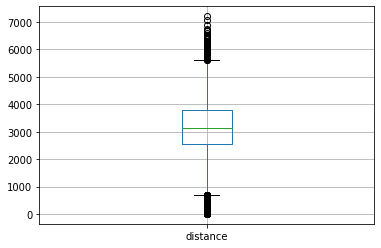

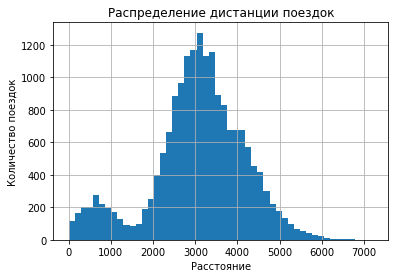

In [20]:
research(rides,
        'distance',
        50,
        'Распределение дистанции поездок',
        'Расстояние',
        'Количество поездок')

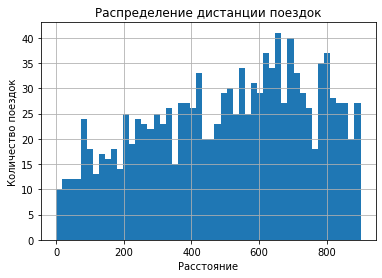

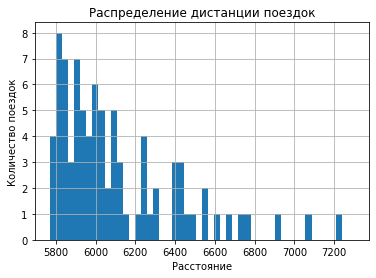

In [21]:
def dist(min_range,max_range):
    rides[['distance']].hist(bins=50, range=(min_range,max_range))
    plt.title('Распределение дистанции поездок')
    plt.xlabel('Расстояние')
    plt.ylabel('Количество поездок')
    plt.show() 

dist(0,900)
dist(5770,7300)

#описательная статистика для сопровождения разброса числами
display(rides[['distance']].describe()) 
#столбчатая диаграмма для демонстрации квартилей и выбросов
rides.boxplot('distance') 

Из этих данных посмотрю на гистограмме распределение количества значений так же выбросы в начале и конце

rides[['distance']].hist(bins=50, range=(0,7300))
plt.show() 
rides[['distance']].hist(bins=50, range=(0,900))
plt.show() 
rides[['distance']].hist(bins=50, range=(5770,7300))
plt.show() 

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Наличие пары пиков дистанций наталкивает на мысль, что может быть несколько сценариев пользования приложением и с этими категориями стоит отдельно работать

## 3.5 Продолжительность поездок

count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

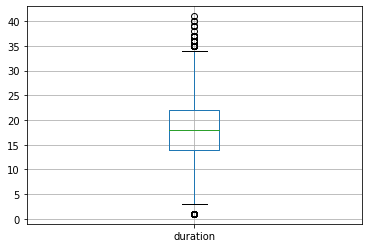

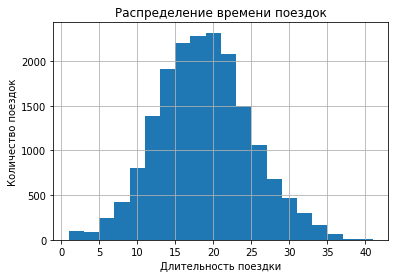

In [22]:
research(rides,
        'duration',
        20,
        'Распределение времени поездок',
        'Длительность поездки',
        'Количество поездок')

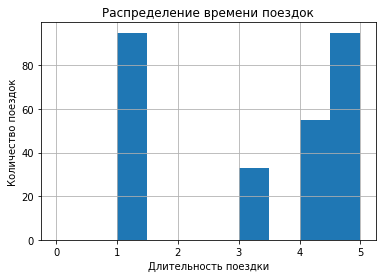

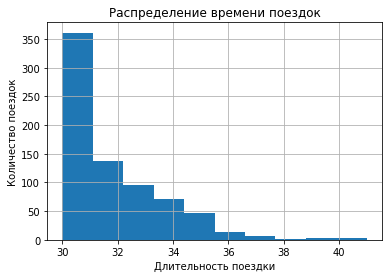

In [23]:
def dur(min_range,max_range):
    rides[['duration']].hist(bins=10, range=(min_range,max_range))
    plt.title('Распределение времени поездок')
    plt.xlabel('Длительность поездки')
    plt.ylabel('Количество поездок')
    plt.show() 

dur(0,5)
dur(30,41)


display(rides[['duration']].describe()) 

rides.boxplot('duration') 

rides[['duration']].hist(bins=20, range=(0,41))
plt.show() 
rides[['duration']].hist(bins=10, range=(0,5))
plt.show() 
rides[['duration']].hist(bins=10, range=(30,41))
plt.show() 

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

Рекомендовал бы внимательнее рассмотреть поездки, которые длились до минуты, это похоже на аномалии и стоит убедиться, короткие ли это поездки или какие-то сбои логирования
</div>

,user_id,distance,duration,date,month
6531,701,4196.445201,1.0,2021-08-31,8
6570,704,4830.824371,1.0,2021-10-14,10
6680,712,4684.004397,1.0,2021-03-04,3
6695,713,5215.642710,1.0,2021-02-25,2
6768,718,5197.436649,1.0,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,1.0,2021-01-19,1
17242,1477,6724.932981,1.0,2021-01-12,1
17314,1483,4445.481070,1.0,2021-03-06,3
17505,1496,5722.551787,1.0,2021-02-14,2


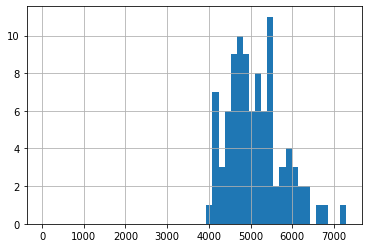

In [24]:
rides_q = rides.loc[rides['duration'] <= 1]
rides_q['distance'].hist(bins=50, range=(0,7300))
rides_q

<div class="alert alert-info"> <b>Комментарий студента:</b> Согласен. в этом случае могло и быть такое что время было бы в другом диапазоне и как такие аномалии выделить? строить соотношение времени с дистанцией? так делают? как это в коде выражают?
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Мне нравится здесь идея посмотреть скорость поездок, если скорость какая-то аномально низкая или высокая - основание для доп рассмотрения 
</div>

In [25]:
rides = rides[rides['distance'] >= 500]
rides = rides[rides['duration'] >= 4]

In [26]:
len(rides)

17411

<div class="alert alert-info"> <b>Комментарий студента:</b> Комментарии к исследованию дистанции и времени, ниже. спасибо за твой комментарий про подписи графиков, когда их добавил понял что лучше функцией это сделать. Появился вопрос как обращаться  например к данным Q1 и Q3 (квартили) мне это нужно было для создания функции с параметрами в range для hist.
    
    например, как поставить параметр bins я понял:
    
    bins = df[parameter].max()-df[parameter].min()
    
    range = (df[parameter].min(), Q1)
</div>
<div class="alert alert-info"> <b>Комментарий студента:</b> так хотел составить более универсальную функцию:    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Ниже попробовал, нужно к `int` привести `bins`, ну и не хватило задания Q1, Q3

</div>

count    17411.000000
mean        18.690598
std          5.800118
min          4.000000
25%         15.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

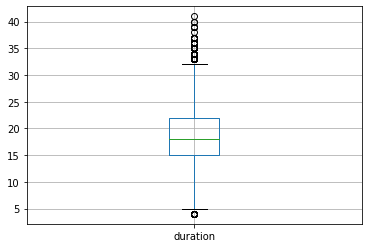

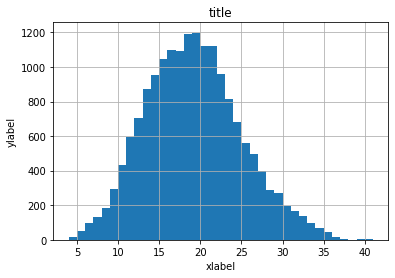

NameError: name 'Q1' is not defined

In [28]:
# Код ревьюера

def research(df, 
             parameter,  
             title,
             xlabel, 
             ylabel):
    display(df[parameter].describe())
    df.boxplot(parameter)
    plt.show()
    def hist_range(min_range,max_range):
        rides[['duration']].hist(
            bins=int(df[parameter].max()-df[parameter].min()), 
            range=(min_range,max_range))
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()
    hist_range(df[parameter].min(), df[parameter].max())
    hist_range(df[parameter].min(), Q1)
    hist_range(Q3, df[parameter].max())
    
research(rides, 'duration',  
             'title',
             'xlabel', 
             'ylabel')

```
def research(df, 
             parameter,  
             title,
             xlabel, 
             ylabel):
    display(df[parameter].describe())
    df.boxplot(parameter)
    plt.show()
    def hist_range(min_range,max_range):
        rides[['duration']].hist(
            bins=df[parameter].max()-df[parameter].min(), 
            range=(min_range,max_range))
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()
    hist_range(df[parameter].min(), df[parameter].max())
    hist_range(df[parameter].min(), Q1)
    hist_range(Q3, df[parameter].max())
```
   
#это в принципе сработает?

<div class="alert alert-info"> <b>Комментарий студента:</b> Обобщающий комментарий по итогом шага:    
</div>

## Вывод шаг 3.

Распределение дистанций поездок показывает два пика около 700 метров, и около 3200 метров. 
при этом
Распределение времени поездок не показывает два пика.

Интересное наблюдение в рамках данного проекта можно задать вопрос к новому исследованию с проверкой соотношения времени и дистанции а так же более глубинный срез по двум группам с пиками в дистанции 700 и 3200 метров о их истинных использований клиентами (до или от станции метро, остановки транспорта для меньшего пика и полноценная поездка по маршруту связанному с рабочим графиком, прогулки или проезд между достопримечательностями)

Общая информация после анализа показывает:
 - Максимальная дистанция 7,2 км. чаще всего проезжают от 2,5 до 3,5 км есть отдельная группа с частотой использования около 700 метров.
 - По времени использования наблюдается равномерное распределение с более частым использованием примерно на 12-25 минут
 - найдены 95 наблюдений с чрезвычайно малым временем поездки (менее 1 минуты) и расстоянием в несколько километров🚀 требуется проверка записи данных.


После небольшого среза остаются данные в 17394 сток из 18068, это на 3,7 %. Объективного влияния на проверку гипотез эти данные не окажут.


# 4. Шаг 4. Объединить данные

## 4.1 Объединить данные о пользователях и поездках с помощью .merge()

In [35]:
rides_user = rides.merge(users, on='user_id', how='left')
rides_user.info()
rides_user.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17411 entries, 0 to 17410
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            17411 non-null  int64         
 1   distance           17411 non-null  float64       
 2   duration           17411 non-null  float64       
 3   date               17411 non-null  datetime64[ns]
 4   month              17411 non-null  int64         
 5   name               17411 non-null  object        
 6   age                17411 non-null  int64         
 7   city               17411 non-null  object        
 8   subscription_type  17411 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 1.3+ MB


,user_id,distance,duration,date,month,name,age,city,subscription_type
0,1,4409.91914,26.0,2021-01-01,1,Кира,22,Тюмень,ultra


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

* Прошу ещё добавить проверку, что после соединения таблиц не возникли пропуски, что размер объъединенной таблице соответствует ожиданиям
* Не хватает комментариев по всей работе после каждой визуализации, или хотя бы обобщающие по итогам шага
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> и правда после метода .merge могут возникнуть пропуски. спасибо.
    
    На Яндекс практикум надейся, а сам на плошай!
</div>

После проверки общее количество строк соответствует данным по поездкам после среза 1711 во всех строчках

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Тут всё в порядке, но да, пару проектов критерии проверки просят добавлять такие проверки

</div>

In [36]:
# нашел для себя интересный способ проверки пропусков
rides_user.describe(include = "all")

/tmp/ipykernel_78/3701098078.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  rides_user.describe(include = "all")


,user_id,distance,duration,date,month,name,age,city,subscription_type
count,17411.000000,17411.000000,17411.000000,17411,17411.000000,17411,17411.000000,17411,17411
unique,NaN,NaN,NaN,364,NaN,194,NaN,8,2
top,NaN,NaN,NaN,2021-12-22 00:00:00,NaN,Анна,NaN,Пятигорск,free
freq,NaN,NaN,NaN,69,NaN,302,NaN,2444,10926
first,NaN,NaN,NaN,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2021-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,832.813279,3149.662126,18.690598,NaN,6.479812,NaN,24.884785,NaN,NaN
std,436.474730,1005.317316,5.800118,NaN,3.433588,NaN,4.587129,NaN,NaN
min,1.000000,500.435521,4.000000,NaN,1.000000,NaN,12.000000,NaN,NaN
25%,469.000000,2603.112363,15.000000,NaN,4.000000,NaN,22.000000,NaN,NaN


Для категориальных признаков этот метод показывает: 
- Сколько уникальных значений в наборе данных - unique; 
- top значения; 
- частота появления значений - freg.

<div class="alert alert-info"> <b>Комментарий студента:</b> Новые наблюдения стоит отметить:
    
    - период исследования 2021 год с 1 января по 30 декабря
    - уникальных имен зарегистрировано  194 шт.
    - самое частое имя пользователя `Анна`
    - Пятигорск не только в лидерах по количеству пользователей но и так же лидер по количеству поездок
</div>

## 4.2 Создание ещё двух датафреймов из датафрейма, созданного на этапе 4.1:
 - c данными о пользователях без подписки;
 - с данными о пользователях с подпиской.

In [37]:
rides_user_ultra = rides_user.loc[rides_user['subscription_type'] == 'ultra']
rides_user_ultra

,user_id,distance,duration,date,month,name,age,city,subscription_type
0,1,4409.919140,26.0,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.592153,16.0,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.159807,7.0,2021-04-20,4,Кира,22,Тюмень,ultra
3,1,2694.783254,19.0,2021-08-11,8,Кира,22,Тюмень,ultra
4,1,4028.687306,27.0,2021-08-28,8,Кира,22,Тюмень,ultra
...,...,...,...,...,...,...,...,...,...
6480,699,3973.046497,25.0,2021-08-29,8,Оксана,22,Москва,ultra
6481,699,3288.702563,16.0,2021-09-12,9,Оксана,22,Москва,ultra
6482,699,3076.159348,15.0,2021-09-26,9,Оксана,22,Москва,ultra
6483,699,4707.845501,16.0,2021-10-17,10,Оксана,22,Москва,ultra


In [38]:
rides_user_free = rides_user.loc[rides_user['subscription_type'] == 'free']
rides_user_free

,user_id,distance,duration,date,month,name,age,city,subscription_type
6485,700,2515.690719,15.0,2021-01-02,1,Айдар,22,Омск,free
6486,700,846.932642,17.0,2021-02-01,2,Айдар,22,Омск,free
6487,700,4004.434142,21.0,2021-02-04,2,Айдар,22,Омск,free
6488,700,1205.911290,10.0,2021-02-10,2,Айдар,22,Омск,free
6489,700,3047.379435,18.0,2021-02-14,2,Айдар,22,Омск,free
...,...,...,...,...,...,...,...,...,...
17406,1534,3781.098080,20.0,2021-11-04,11,Альберт,25,Краснодар,free
17407,1534,2840.423057,22.0,2021-11-16,11,Альберт,25,Краснодар,free
17408,1534,3826.185507,19.0,2021-11-18,11,Альберт,25,Краснодар,free
17409,1534,2902.308661,17.0,2021-11-27,11,Альберт,25,Краснодар,free


<div class="alert alert-info"> <b>Комментарий студента:</b> ниже это к следующему комментарию. Переделал вместо двух разных гистограмм, одну с возможностью наложить данные друг на друга
</div>

## 4.3 Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий.

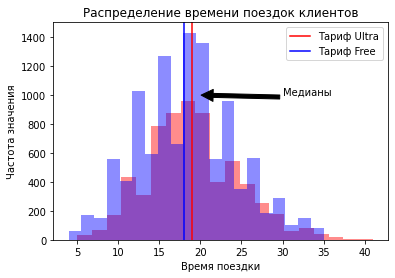

In [39]:
plt.hist(rides_user_ultra['duration'], bins=20, alpha=0.45, color='red') 
plt.hist(rides_user_free[['duration']], bins=20, alpha=0.45, color='blue')
plt.axvline(x=rides_user_ultra['duration'].median(), color='red')
plt.axvline(x=rides_user_free['duration'].median(), color='blue')
plt.title('Распределение времени поездок клиентов')
plt.xlabel('Время поездки')
plt.ylabel('Частота значения')
plt.legend(['Тариф Ultra',  
            'Тариф Free'])

plt.annotate("Медианы", xy=(20, 1000), xytext=(30, 1000),
            arrowprops=dict(facecolor='black', shrink=0.01))

plt.show() 

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

А здесь напомню о важности подписывать оси и добавлять заголовок графикам
</div>

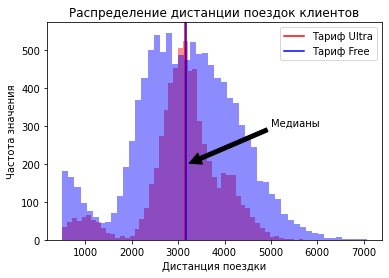

In [40]:
plt.hist(rides_user_ultra['distance'], bins=50, alpha=0.45, color='red') 
plt.hist(rides_user_free[['distance']], bins=50, alpha=0.45, color='blue')
plt.axvline(x=rides_user_ultra['distance'].median(), color='red')
plt.axvline(x=rides_user_free['distance'].median(), color='blue')
plt.title('Распределение дистанции поездок клиентов')
plt.xlabel('Дистанция поездки')
plt.ylabel('Частота значения')
plt.legend(['Тариф Ultra',  
            'Тариф Free'])
plt.annotate("Медианы", xy=(3200, 200), xytext=(5000, 300),
            arrowprops=dict(facecolor='black', shrink=0.02))

plt.show() 

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
* Проще сравнивать распределения на одном графике, поэтому рекомендовал бы продолжительность двух категорий расположить на одном графике, аналогично с расстоянием
* На графиках отлично смотрится среднее или медиана, как дополнительное опорной значение, вот [тут](https://stackoverflow.com/questions/16930328/vertical-horizontal-lines-in-matplotlib) можно посмотреть, как добавить такую визуализацию

<div class="alert alert-info"> <b>Комментарий студента:</b> Спасибо, да так лучше 
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Со стрелочкой изящно кстати, спасибо!)

</div>

Исходные данные соединили в одну таблицу где видим новые наблюдения, что важно для нас:
 - при распределении поездок согласно их тарифам: почти 6,5 тысяч были сделаны клиентами с подпиской и около 11 тысяч клиентами без подписки. соотношение 37% и 63 % соответственно.
 - Распределения по графикам времени и дистанции схожи не считая частоты использования, Распределения нормальны.
 - Следует отметить что у обоих групп имеются два пика на небольших расстояниях около 1 км и около 3км. разброс данных клиентов с подпиской меньше.
 - Медианные значения близки друг к другу, немногим выше среднее время поездки а дистанция отличается не значительно.
        

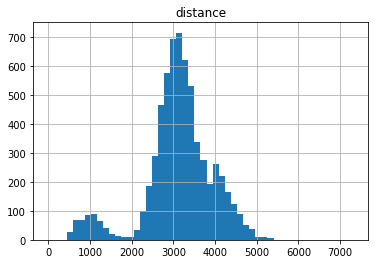

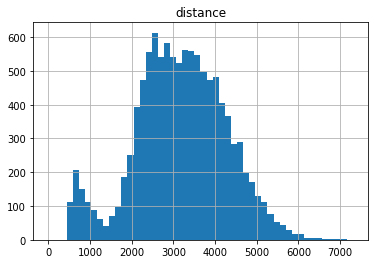

In [41]:
rides_user_ultra[['distance']].hist(bins=50, range=(0,7300))
plt.show() 
rides_user_free[['distance']].hist(bins=50, range=(0,7300))
plt.show() 

# Шаг 5. Подсчёт выручки

In [42]:
#группировка, суммирование и подсчет
rides_user_revenue = rides_user.pivot_table(
    index=[
        'subscription_type', 
        'month', 
        'user_id'
    ], 
    values=['duration', 'distance'], 
    aggfunc=['sum', 'count']
)
# переименование столбцов
rides_user_revenue.columns = ['sum_distance', 'sum_duration', 'count_rides', 'del']

# удалить лишний столбец количества поездок
del rides_user_revenue['del']

# убираю мультииндекс
rides_user_revenue = rides_user_revenue.reset_index()


rides_user_revenue

,subscription_type,month,user_id,sum_distance,sum_duration,count_rides
0,free,1,700,2515.690719,15.0,1
1,free,1,701,2676.472894,18.0,1
2,free,1,702,903.861985,16.0,1
3,free,1,703,3406.580225,24.0,1
4,free,1,704,3197.139639,18.0,1
...,...,...,...,...,...,...
11109,ultra,12,688,4004.404223,24.0,1
11110,ultra,12,689,3387.343067,19.0,1
11111,ultra,12,692,2947.000211,15.0,1
11112,ultra,12,694,3591.099488,18.0,1


In [43]:
#присоединение данных для расчета выручки
rides_user_revenue =  pd.merge(rides_user_revenue, subscriptions, on='subscription_type')
rides_user_revenue

,subscription_type,month,user_id,sum_distance,sum_duration,count_rides,minute_price,start_ride_price,subscription_fee
0,free,1,700,2515.690719,15.0,1,8,50,0
1,free,1,701,2676.472894,18.0,1,8,50,0
2,free,1,702,903.861985,16.0,1,8,50,0
3,free,1,703,3406.580225,24.0,1,8,50,0
4,free,1,704,3197.139639,18.0,1,8,50,0
...,...,...,...,...,...,...,...,...,...
11109,ultra,12,688,4004.404223,24.0,1,6,0,199
11110,ultra,12,689,3387.343067,19.0,1,6,0,199
11111,ultra,12,692,2947.000211,15.0,1,6,0,199
11112,ultra,12,694,3591.099488,18.0,1,6,0,199


In [44]:
# новый столбец с выручкой по каждому ID в разные месяца
rides_user_revenue['revenue'] = rides_user_revenue['start_ride_price'] * rides_user_revenue['count_rides'] + \
rides_user_revenue['minute_price'] * rides_user_revenue['sum_duration'] + rides_user_revenue['subscription_fee']

# проверим расчет с подпиской и без неё
display(rides_user_revenue.head(1))
rides_user_revenue.tail(1)

,subscription_type,month,user_id,sum_distance,sum_duration,count_rides,minute_price,start_ride_price,subscription_fee,revenue
0,free,1,700,2515.690719,15.0,1,8,50,0,170.0


,subscription_type,month,user_id,sum_distance,sum_duration,count_rides,minute_price,start_ride_price,subscription_fee,revenue
11113,ultra,12,699,3202.89077,26.0,1,6,0,199,355.0


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Абсолютно верный расчёт доходов, можно двигаться к проверке гипотез
    

Расчет верный 

In [45]:
rides_user_revenue['revenue'].sum()

3802923.0

# 6. Шаг 6. Проверка гипотез

Гипотезы, которые необходимо проверить:

- 1 Тратят ли пользователи с подпиской больше времени на поездки?
- 2 Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
- 3 Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

In [46]:
#импорт библиотеки SciPy для использования её методов
from scipy import stats as st

## 6.1 Тратят ли пользователи с подпиской больше времени на поездки?

In [47]:
# время первой группы пользователей (без подписки)
duration_free = rides_user_free['duration']
print('Среднее выборки:', duration_free.mean())

Среднее выборки: 18.4704374885594


In [48]:
# время второй группы пользователей (с подпиской)
duration_ultra = rides_user_ultra['duration']
print('Среднее выборки:', duration_ultra.mean())

Среднее выборки: 19.0615265998458


In [49]:
# уровень статистической значимости
alpha = 0.05 

In [50]:
# Нулевая гипотеза: пользователи с подпиской в среднем тратят столько же времени на поездку, сколько и пользователи без подписки
# альтернативная гипотеза: пользователи с подпиской тратят больше времени на поездки.
#H0: μ=20
#H1: μ>20
# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(duration_ultra, duration_free, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')
    
    
    
    

p-value: 3.889437860363158e-11
Отвергаем нулевую гипотезу


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Здесь важен порядок переменных в методе, в конфигурации как выше проверяется альтернативная гипотеза о том, больше ли длительность поездок без подписки
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> да точно. Получается что:
    
    results = st.ttest_ind( duration_free, duration_ultra, alternative='greater')
    больше ли длительность поездок без подписки
    
    results = st.ttest_ind(duration_ultra, duration_free, alternative='greater')
    больше ли длительность поездок с подпиской
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Спасибо!
</div>

Нулевая гипотеза отвергнута, соответственно пользователи с подпиской тратят больше времени на поездки. 

## 6.2 Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

In [51]:
# набор данных из расстояния для пользователей с подпиской
distance_ultra = rides_user_ultra['distance']
print('Среднее выборки:', distance_ultra.mean())

Среднее выборки: 3121.8003923702427


In [52]:
# Значение проверяемой гипотезы 
mean_distance_ultra = 3130

In [53]:
# Нулевая гипотеза: пользователи с подпиской проезжают среднее расстояние 3130 метров.
# альтернативная гипотеза: пользователи с подпиской проезжают меньше 3130 метров.

#H0: μ=20
#H1: μ<20
# уровень статистической значимости
alpha = 0.05

In [54]:
results = st.ttest_1samp(
    distance_ultra,
    mean_distance_ultra,
    alternative='less')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.21241855920450992
Не отвергаем нулевую гипотезу


Вероятность проехать расстояние 3130 м больше статистической значимости, поэтому нулевая гипотеза не отвергается.

## 6.3 Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

In [55]:
month_revenue_ultra = rides_user_revenue.loc[rides_user_revenue['subscription_type'] == 'ultra', 'revenue']
month_revenue_free = rides_user_revenue.loc[rides_user_revenue['subscription_type'] == 'free', 'revenue']


In [56]:
# задаём уровень значимости
alpha = 0.05

In [57]:
# Нулевая гипотеза: выручка по месяцам от пользователи с подпиской такая же как без подписки.
# альтернативная гипотеза: выручка по месяцам от пользователи с подпиской больше, чем выручка от пользователей без подписки.

#H0: μ=20
#H1: μ>20
# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(month_revenue_ultra, month_revenue_free, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.0346435060563057e-33
Отвергаем нулевую гипотезу


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Предполагалась проверка не агрегированных доходов по месяцам, а по связке пользователь, месяц 
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 🤦🏻исправил, так даже интереснее получилось</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Отлично, что формулируешь нулевую, альтернативную гипотезу, это важно, выводы верны, ещё могу порекомендовать дополнительно проверять себя и выводить среднее проверяемых переменных или распределения

In [58]:
Нулевая гипотеза отвергнута, соответственно пользователи с подпиской приносят больше дохода. 

SyntaxError: invalid syntax (2283596905.py, line 1)

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

- Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок в Python, применим метод 

`scipy.stats.ttest_rel().`

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

А какую альтернативную гипотезу ты бы использовал?
</div>

<div class="alert alert-info"> 
<b>Комментарий студента:</b> 
    
 
 Альтернативная гипотеза: Количество обращений после обновления снизилось
    
    scipy.stats.ttest_rel(после, до, alternative='less')
    

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Да, гипотеза одностороння, отлично, желаю успехов в дальнейшем обучении
</div>

# Вывод

<u>Цель проекта:</u> проверка трех гипотез которые помогут бизнесу вырасти

Вводная информация и данные предоставлены из **большого** массива, более **18 тыс. наблюдений**. Которые исходные и первичны по своему происхождению и не имеют пробелов и выбросов.

Предобработке подвергалась следующая часть: 
 - Тип данных даты приведен к datetime для выявления периода в месяц, собранной информации. 
 - Выявленные дубликаты в количестве 31 шт удалены на результаты они не повлияли.
 - Создан отдельный столб для группировки по месяцам.
 - Расчет за поездку происходит за полные минуты использования сервиса, соответственно округлил длительность до целых чисел.


<u>Исследовательский анализ</u> показал: 
    **Факты:**
    - в Пятигорске 219 зарегистрированных пользователей, и он является лидером среди всех 8 городов.
    - 46% пользователей имеют подписку
    - Сервис популярен среди людей от 20 до 30 лет в целом пользуются примерно от 12 до 43 лет. 
    - Максимальная дистанция 7,2 км. чаще всего проезжают от 2,5 до 3,5 км 
    - Более частое время поездок примерно на 12-25 минут
    
   *Наблюдения* 
   - есть куда расти по географии, 8 городов не предел.
   - либо в существующих городах, совокупное население городов присутствия 20 млн человек.
   - Еще 54 % пользователей не оформили подписку на сервис
   - Минимальный возраст пользователя 12 лет, могут быть проблемы с законодательством, ограничивающим возраст пользователей до 18 лет.
   - проверить потребность клиентов с пиками дистанций 700м и 3000м
   - 95 наблюдений с чрезвычайно малым временем поездки (менее 1 минуты) и расстоянием в несколько киломеров🚀 требуется проверка записи данных.
    


<u>Один из запросов проекта был подсчёт выручки.</u> 

  *Шаг 1* Данные объединены из разных файлов.\
  *Шаг 2* Каждой поездке присвоены параметры расчета согласно тарифу.\
  *Шаг 3* Расчет каждой поездки согласно тарифу. \
  *Шаг 4* Группировка, суммирование по месяцам.\
  ***3,8 млн - это выручка по текущим поездкам***
  
<u>ГИПОТЕЗЫ</u> , нашего проекта:

 * Первая гипотеза звучала так:\
 "Тратят ли пользователи с подпиской больше времени на поездки?" \
 **Результат:** Да время поездок у пользователей с подпиской больше. Соответственно они выгоднее.

 * Вторая гипотеза:\
 "Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку не превышает 3100 метров" \
 **Результат** Проверить эту гипотезу не получилось, так как с вероятностью около 21 %  пользователи проезжают среднее расстояние около 3130 м и более.  

 * Третья гипотеза:\
 " Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?" \
 **Результат** Да, пользователи с подпиской приносят больше дохода. следовательно развиваем долю клиентов с подпиской.
 



<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Было бы хорошо добавить маркированный список, возможно не один, что-то выделить жирным, чтобы повысить читаемость вывода